<a href="https://colab.research.google.com/github/guifav/calls_analyzer/blob/main/1_transcricao_ligacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 1 de 2 - Transcrição de Ligações

## Para mais informações e tutoriais

Site do autor: [www.guilhermefavaron.com.br](https://www.guilhermefavaron.com.br)

O projeto completo pode ser acessado no github: [https://github.com/guifav/calls_analyzer](https://github.com/guifav/calls_analyzer)

O Diretório de arquivos e pastas deve estar organizado conforme abaixo:

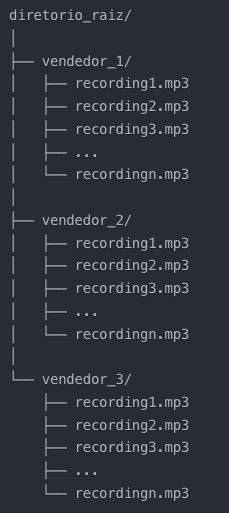

# Instalando recursos necessários

In [ ]:
# Instalar Biblioteca OpenAI (Whisper)
!pip install openai

# Fazer a transcrição e salvar em arquivo JSON
Este arquivo JSON conterá informações das ligações de cada vendedor e será salvo na pasta das ligações do vendedor

In [ ]:
import os
import json
from google.colab import drive
from openai import OpenAI
import glob
from google.colab import userdata

# Retrieve the API key
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

# Montar o Google Drive
drive.mount('/content/drive')

# Configurar o cliente OpenAI
client = OpenAI(api_key=OPENAI_API_KEY)

# Definir o diretório raiz do projeto
root_dir = '/content/drive/MyDrive/ai_gui'

# Lista de pastas dos Vendedoress
sales_folders = ['jose_silva', 'luciano_pavarosi', 'carmelo_morais']

def transcribe_audio(file_path):
    with open(file_path, "rb") as audio_file:
        transcription = client.audio.transcriptions.create(
            model="whisper-1",
            file=audio_file
        )
    return transcription.text

# Processar cada pasta de Sales
for sales_folder in sales_folders:
    sales_path = os.path.join(root_dir, sales_folder)
    transcriptions = {}

    # Encontrar todos os arquivos MP3 na pasta do Sales
    mp3_files = glob.glob(os.path.join(sales_path, '*.mp3'))

    # Transcrever cada arquivo MP3
    for mp3_file in mp3_files:
        file_name = os.path.basename(mp3_file)
        print(f"Transcrevendo {file_name}...")
        transcription = transcribe_audio(mp3_file)
        transcriptions[file_name] = transcription

    # Salvar todas as transcrições em um único arquivo JSON
    json_file_path = os.path.join(sales_path, f'{sales_folder}_transcriptions.json')
    with open(json_file_path, 'w') as json_file:
        json.dump(transcriptions, json_file, indent=2)

    print(f"Transcrições para {sales_folder} salvas em {json_file_path}")

print("Processamento concluído!")